In [1]:
import glob
import sys
sys.path.insert(0, "/home/ubuntu/data/code/Modules/")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix,accuracy_score
import CNN_Module as cnn_module
import models

Using TensorFlow backend.


In [2]:
# finding all resistant flucs
res_flucs = []
paths_l = []
for sample in glob.glob('/home/ubuntu/data/resistant/sample*'):
    print(sample)
    csv_path = glob.glob(sample+'/out/*checked.csv')
    print(csv_path)
    flucs = np.array(pd.read_csv(csv_path[0])['fluctuations'])
    paths = np.array(pd.read_csv(csv_path[0])['video'])
    res_flucs.append(list((flucs)))
res_flucs=[item for sublist in res_flucs for item in sublist]
#print(res_flucs)


/home/ubuntu/data/resistant/sample52
['/home/ubuntu/data/resistant/sample52/out/sample2_fluctuations_25_checked.csv']
/home/ubuntu/data/resistant/sample36
['/home/ubuntu/data/resistant/sample36/out/sample6_fluctuations_25_checked.csv']
/home/ubuntu/data/resistant/sample42
['/home/ubuntu/data/resistant/sample42/out/sample2_fluctuations_25_checked.csv']
/home/ubuntu/data/resistant/sample34
['/home/ubuntu/data/resistant/sample34/out/sample4_fluctuations_25_checked.csv']
/home/ubuntu/data/resistant/sample24
['/home/ubuntu/data/resistant/sample24/out/sample4_fluctuations_25_checked.csv']
/home/ubuntu/data/resistant/sample28
['/home/ubuntu/data/resistant/sample28/out/sample8_fluctuations_25_checked.csv']
[0.4105601323258871, 0.2492287167989228, 0.1912419898435697, 0.25145341079894984, 0.37586532491543895, 0.4540137046534464, 0.3237048144351004, 0.3445670103204346, 0.3714476252166599, 0.2445139433575501, 0.3911178476272494, 0.2915990885935849, 0.4364501098072686, 0.4474303337743871, 0.4785401

In [3]:
#finding all susceptible flucs
sus_flucs = []
paths_l = []
for sample in glob.glob('/home/ubuntu/data/susceptible/sample*'):
    print(sample)
    csv_path = glob.glob(sample+'/out/*checked.csv')
    print(csv_path)
    flucs = np.array(pd.read_csv(csv_path[0])['fluctuations'])
    paths = np.array(pd.read_csv(csv_path[0])['video'])
    sus_flucs.append(list(flucs))
    paths_l.append(list(paths))
sus_flucs=[item for sublist in sus_flucs for item in sublist]
print(len(sus_flucs))

/home/ubuntu/data/susceptible/sample44
['/home/ubuntu/data/susceptible/sample44/out/sample4_fluctuations_25_checked.csv']
/home/ubuntu/data/susceptible/sample46
['/home/ubuntu/data/susceptible/sample46/out/sample6_fluctuations_25_checked.csv']
/home/ubuntu/data/susceptible/sample15
['/home/ubuntu/data/susceptible/sample15/out/sample5_fluctuations_25_checked.csv']
/home/ubuntu/data/susceptible/sample22
['/home/ubuntu/data/susceptible/sample22/out/sample2_fluctuations_25_checked.csv']
/home/ubuntu/data/susceptible/sample25
['/home/ubuntu/data/susceptible/sample25/out/sample5_fluctuations_25_checked.csv']
/home/ubuntu/data/susceptible/sample34
['/home/ubuntu/data/susceptible/sample34/out/sample4_fluctuations_25_checked.csv']
/home/ubuntu/data/susceptible/sample38
['/home/ubuntu/data/susceptible/sample38/out/sample8_fluctuations_25_checked.csv']
351


In [7]:
# finally, finding the control flucs. for these, ensure there is only one 'checked' csv file in /out
# never change path of control!
ctrl_flucs = []
paths_l = []
for sample in glob.glob('/home/ubuntu/data/control/sample*'):
    csv_path = glob.glob(sample+'/out/*checked.csv')
    flucs = np.array(pd.read_csv(csv_path[0])['fluctuations'])
    paths = np.array(pd.read_csv(csv_path[0])['video'])
    ctrl_flucs.append(list(flucs))
    paths_l.append(list(paths))
ctrl_flucs=[item for sublist in ctrl_flucs for item in sublist]
print(ctrl_flucs)

[0.3614873312552294, 0.4215227705717347, 0.5221840437986567, 0.4038852485966725, 0.2980411552299937, 0.3353130196068158, 0.2721865482962497, 0.372184733760141, 0.3825098841163505, 0.2619089905906641, 0.28802166764745163, 0.4872710223274191, 0.28107938510486125, 0.2800344246669505, 0.3226626351743869, 0.5368741949636653, 0.5096248264012946, 0.22612937165442235, 0.2830972701658517, 0.3248818622545559, 0.39391126896522605, 0.3210179815558685, 0.2402147372530447, 0.2945085720404419, 0.4113497727685489, 0.32587456963977235, 0.13222741710132765, 0.26787684863185024, 0.4383860208022489, 0.4439731795315474, 0.2957261050068114, 0.3910567066171197, 0.3632768981133894, 0.16132004283947576, 0.3117591392461576, 0.3752443556923176, 0.3611892467548803, 0.527920936208673, 0.351963158677236, 0.243054640010941, 0.3543619959283798, 0.2645517871539492, 0.21094475554931025, 0.3841420940444837, 0.3626208644321106, 0.31033188324252536, 0.4028101827856523, 0.03901374272863711, 0.44811424947728973, 0.426302024

In [8]:
import Get_Simple_Fluctuations_Average_Intensity as simp

In [13]:
# find sus, res, control lengths
sus_lengths_paths = simp.getlengths('/home/ubuntu/data/susceptible/')
sus_lengths = [length[1] for length in sus_lengths_paths]

res_lengths_paths = simp.getlengths('/home/ubuntu/data/resistant/')
res_lengths = [length[1] for length in res_lengths_paths]

# dont change path of control!
ctrl_lengths_paths = simp.getlengths('/home/ubuntu/data/control/')
ctrl_lengths = [length[1] for length in ctrl_lengths_paths]

print(len(sus_lengths))
print(len(ctrl_lengths))

351
361


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


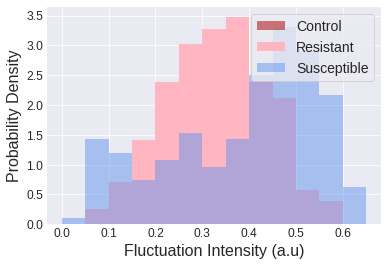

In [15]:
#plotting with lobf
import scipy.stats as stats
bins = np.arange(0,0.7,0.05)
plt.style.use('seaborn-darkgrid')
ctrl_hist,ctrl_bins,ctrl_patches = plt.hist(ctrl_lengths,bins=bins,density=1,alpha=0.6,color='firebrick',label = 'Control')

res_hist,res_bins,res_patches = plt.hist(res_flucs,bins=bins, density=1,color='lightpink', label = 'Resistant')


sus_hist,sus_bins,sus_patches = plt.hist(sus_flucs,bins=bins, density=1,alpha=0.5,color='cornflowerblue', label = 'Susceptible')

plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel('Fluctuation Intensity (a.u)',fontsize=16)
plt.ylabel('Probability Density',fontsize=16)
plt.legend(loc='upper right',frameon=True,fontsize=14)
plt.show()


#plt.savefig('/home/ubuntu/data/figures/flucs_hist_cipro.png',dpi=500)

11.585304260253906


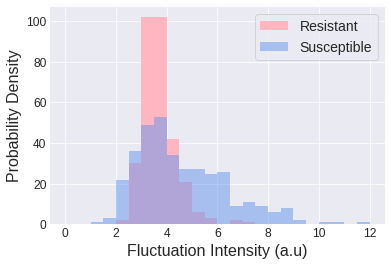

In [ ]:
#plotting with lobf
import scipy.stats as stats
plt.style.use('seaborn-darkgrid')
print(max(sus_lengths))
#print(max([max(ctrl_lengths),max(res_lengths),max(sus_lengths)]))
bins = np.arange(0,12.5,0.5)

res_hist,res_bins,res_patches = plt.hist(res_lengths,bins=bins,color='lightpink', label = 'Resistant')


sus_hist,sus_bins,sus_patches = plt.hist(sus_lengths,bins=bins,alpha=0.5,color='cornflowerblue', label = 'Susceptible')

plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel('Fluctuation Intensity (a.u)',fontsize=16)
plt.ylabel('Probability Density',fontsize=16)
plt.legend(loc='upper right',frameon=True,fontsize=14)
plt.show()

plt.savefig('/home/ubuntu/data/figures/length_hist_cipro.png',dpi=500)

318
311


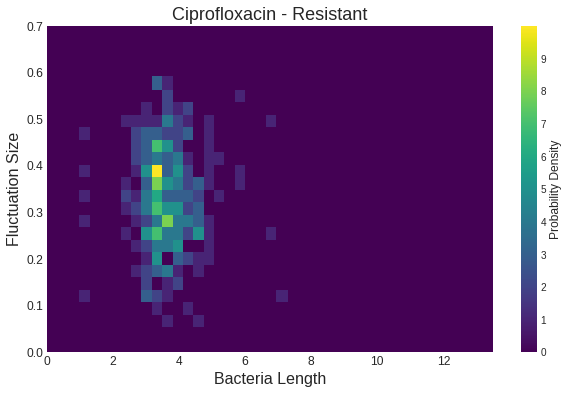

In [35]:
# we shall now investigate any correlations between flucs and length!
# resistant first
print(len(res_lengths))
print(len(res_flucs))

min_length = min(len(res_lengths), len(res_flucs));

res_lengths2 = res_lengths[:min_length]
res_flucs2 = res_flucs[:min_length]

plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor('#440154FF')
plt.hist2d(res_lengths2,res_flucs2,bins=20,cmap='viridis')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel('Bacteria Length',fontsize=16)
plt.ylabel('Fluctuation Size',fontsize=16)
cb = plt.colorbar(ticks=range(0,10),)
cb.set_label(label='Probability Density', size='large')
plt.ylim(0,0.7)
plt.xlim(0,13.5)
plt.title('Ciprofloxacin - Resistant',size='18')

#plt.savefig('/home/ubuntu/data/figures/flucs_lengths_hist_cipro_res.png',dpi=500)

362
351


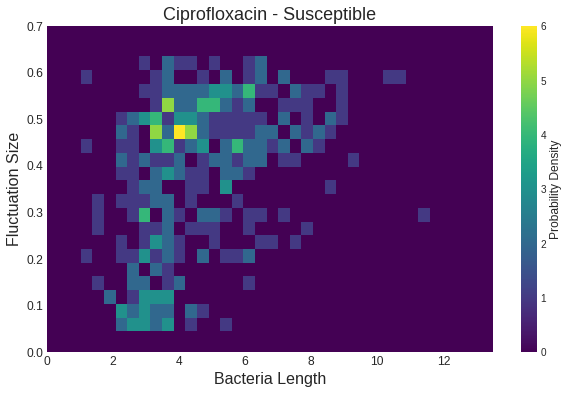

In [36]:
# susceptible lengths vs flucs
print(len(sus_lengths))
print(len(sus_flucs))

min_length = min(len(sus_lengths), len(sus_flucs));
sus_lengths2 = sus_lengths[:min_length]
sus_flucs2 = sus_flucs[:min_length]

plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor('#440154FF')

plt.hist2d(sus_lengths2,sus_flucs2,bins=(30,20),cmap='viridis')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel('Bacteria Length',fontsize=16)
plt.ylabel('Fluctuation Size',fontsize=16)
plt.ylim(0,0.7)
plt.xlim(0,13.5)
cb = plt.colorbar(ticks=range(0,10),)
cb.set_label(label='Probability Density', size='large')
plt.title('Ciprofloxacin - Susceptible', size='18')

#plt.savefig('/home/ubuntu/data/figures/flucs_lengths_hist_cipro_sus.png',dpi=300)

361
360


Text(0.5, 1.0, 'Control')

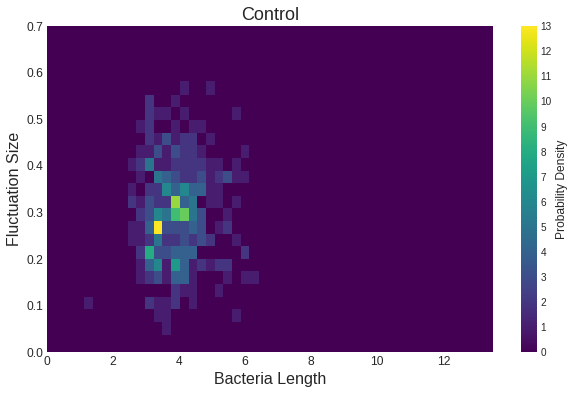

In [59]:
# control
#plt.style.use('seaborn-darkgrid')
print(len(ctrl_lengths))
print(len(ctrl_flucs))

min_length = min(len(ctrl_lengths), len(ctrl_flucs))
ctrl_lengths2 = ctrl_lengths[:min_length]
ctrl_flucs2 = ctrl_flucs[:min_length]

plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor('#440154FF')
plt.hist2d(ctrl_lengths2,ctrl_flucs2,bins=20,cmap='viridis')

plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel('Bacteria Length',fontsize=16)
plt.ylabel('Fluctuation Size',fontsize=16)
plt.ylim(0,0.7)
plt.xlim(0,13.5)
cb = plt.colorbar(ticks=range(0,15),)
cb.set_label(label='Probability Density', size='large')
plt.title('Control',size=18)
#plt.savefig('/home/ubuntu/data/figures/flucs_lengths_hist_ctrl.png',dpi=300)
